In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

##### Loading datasets

In [32]:
df_movies = pd.read_csv("Dataset/movies.dat", sep="::", names=["MovieID","Movie","Genre"])
df_users = pd.read_csv("Dataset/users.dat", sep="::", names=["UserID","Gender","Age", "Ocupation", "Zip-code"])
df_ratings = pd.read_csv("Dataset/ratings.dat", sep="::", names=["UserID","MovieID","Rating", "Timestamp"])

In [3]:
df_movies.describe(include="all")

,MovieID,Movie,Genre
count,3883.000000,3883,3883
unique,NaN,3883,301
top,NaN,"Skin Game, The (1931)",Drama
freq,NaN,1,843
mean,1986.049446,NaN,NaN
std,1146.778349,NaN,NaN
min,1.000000,NaN,NaN
25%,982.500000,NaN,NaN
50%,2010.000000,NaN,NaN
75%,2980.500000,NaN,NaN


In [4]:
df_users.describe(include="all")

,UserID,Gender,Age,Ocupation,Zip-code
count,6040.000000,6040,6040.000000,6040.000000,6040
unique,NaN,2,NaN,NaN,3439
top,NaN,M,NaN,NaN,48104
freq,NaN,4331,NaN,NaN,19
mean,3020.500000,NaN,30.639238,8.146854,NaN
std,1743.742145,NaN,12.895962,6.329511,NaN
min,1.000000,NaN,1.000000,0.000000,NaN
25%,1510.750000,NaN,25.000000,3.000000,NaN
50%,3020.500000,NaN,25.000000,7.000000,NaN
75%,4530.250000,NaN,35.000000,14.000000,NaN


In [5]:
df_ratings.describe(include="all")

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


#### Checks for null value and duplicates

##### Checking duplicates in movies.dat

In [6]:
#checking duplicate by ID
duplicate_moviesByID = df_movies[df_movies.duplicated(['MovieID'])]
duplicate_moviesByID

,MovieID,Movie,Genre


In [7]:
#checking duplicate by Name
duplicate_moviesByID = df_movies[df_movies.duplicated(['Movie'])]
duplicate_moviesByID

,MovieID,Movie,Genre


##### Checking for null values

In [8]:
import seaborn as sns

Heatmap for movies.dat: 


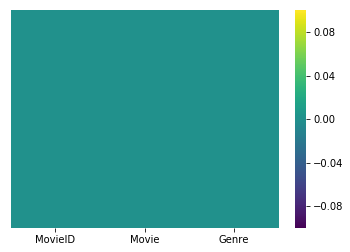

In [9]:
print("Heatmap for movies.dat: ")
sns.heatmap(df_movies.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Heatmap for users.dat: 


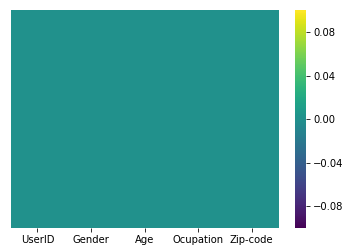

In [10]:
print("Heatmap for users.dat: ")
sns.heatmap(df_users.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Heatmap for ratings.dat: 


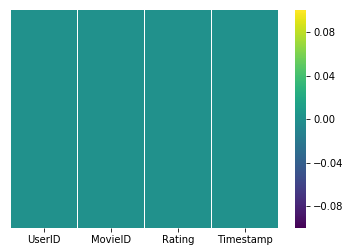

In [11]:
print("Heatmap for ratings.dat: ")
sns.heatmap(df_ratings.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [33]:
# merging movie names with rating dataset
df_ratings = pd.merge(df_ratings, df_movies, on="MovieID")

In [36]:
df_ratings.describe(include="all")

,UserID,MovieID,Rating,Timestamp,Movie,Genre
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1000209,1000209
unique,NaN,NaN,NaN,NaN,3706,301
top,NaN,NaN,NaN,NaN,American Beauty (1999),Comedy
freq,NaN,NaN,NaN,NaN,3428,116883
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08,NaN,NaN
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07,NaN,NaN
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,NaN,NaN
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,NaN,NaN
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,NaN,NaN
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,NaN,NaN


In [38]:
# Average rating of each movie
ratings = pd.DataFrame(df_ratings.groupby('Movie')['Rating'].mean())
ratings.head()

,Rating
Movie,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [39]:
# no. of ratings received by each movie
ratings['number_of_ratings'] = df_ratings.groupby('Movie')['Rating'].count()
ratings.head()

,Rating,number_of_ratings
Movie,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


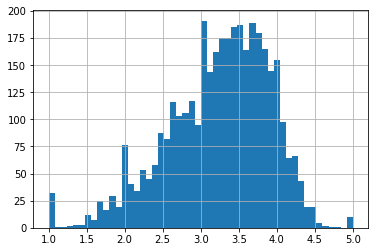

In [40]:
# Plotting a histogram
import matplotlib.pyplot as plt
%matplotlib inline
ratings['Rating'].hist(bins=50)

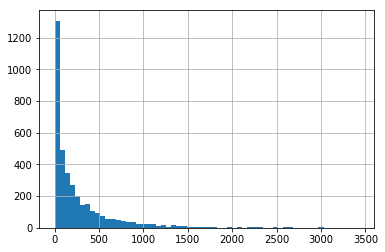

In [41]:
# no. of ratings
ratings['number_of_ratings'].hist(bins=60)

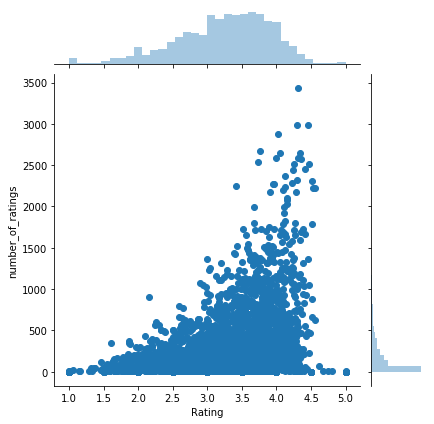

In [43]:
import seaborn as sns
# relationship between no. of ratings and rating of a movie
sns.jointplot(x='Rating', y='number_of_ratings', data=ratings)

In [45]:
# matrix to see how each user has rated each movie
movie_matrix = df_ratings.pivot_table(index='UserID', columns='Movie', values='Rating')
movie_matrix.head()

Movie,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Movies rated the most
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,Rating,number_of_ratings
Movie,,
American Beauty (1999),4.317386,3428
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
Star Wars: Episode V - The Empire Strikes Back (1980),4.292977,2990
Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
Jurassic Park (1993),3.763847,2672
Saving Private Ryan (1998),4.337354,2653
Terminator 2: Judgment Day (1991),4.058513,2649
"Matrix, The (1999)",4.315830,2590
Back to the Future (1985),3.990321,2583


In [70]:
# Taking random movies for testing
Movie_1_Rating = movie_matrix['Air Force One (1997)']
Movie_2_Rating = movie_matrix['Contact (1997)']

In [72]:
Movie_1_Rating.head()
Movie_2_Rating.head()

UserID
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Contact (1997), dtype: float64

In [73]:
similar_to_Movie_1=movie_matrix.corrwith(Movie_1_Rating)
similar_to_Movie_1.head()

Movie
$1,000,000 Duck (1971)           0.529708
'Night Mother (1986)             0.195627
'Til There Was You (1997)        0.238535
'burbs, The (1989)               0.254954
...And Justice for All (1979)    0.092987
dtype: float64

In [74]:
similar_to_Movie_2 = movie_matrix.corrwith(Movie_2_Rating)
similar_to_Movie_2.head()

Movie
$1,000,000 Duck (1971)          -0.119488
'Night Mother (1986)             0.012834
'Til There Was You (1997)        0.205432
'burbs, The (1989)               0.135900
...And Justice for All (1979)    0.269331
dtype: float64

In [75]:
# dropping null values and transforming correlation results into dataframes
corr_Movie_2 = pd.DataFrame(similar_to_Movie_2, columns=['Correlation'])
corr_Movie_2.dropna(inplace=True)
corr_Movie_2.head()

,Correlation
Movie,
"$1,000,000 Duck (1971)",-0.119488
'Night Mother (1986),0.012834
'Til There Was You (1997),0.205432
"'burbs, The (1989)",0.135900
...And Justice for All (1979),0.269331


In [76]:
corr_Movie_1 = pd.DataFrame(similar_to_Movie_1, columns=['correlation'])
corr_Movie_1.dropna(inplace=True)
corr_Movie_1.head()

,correlation
Movie,
"$1,000,000 Duck (1971)",0.529708
'Night Mother (1986),0.195627
'Til There Was You (1997),0.238535
"'burbs, The (1989)",0.254954
...And Justice for All (1979),0.092987


In [77]:
# to fix movies with less no. of ratings being picked
corr_Movie_1 = corr_Movie_1.join(ratings['number_of_ratings'])
corr_Movie_2 = corr_Movie_2.join(ratings['number_of_ratings'])

In [78]:
# selecting movies with atleast 80 reviews
corr_Movie_1[corr_Movie_1['number_of_ratings'] > 80].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
Movie,,
Air Force One (1997),1.000000,1076
My Man Godfrey (1957),0.573099,93
"Raven, The (1963)",0.567069,82
Major League: Back to the Minors (1998),0.529945,142
Monkey Shines (1988),0.525272,161
Fear (1996),0.511704,128
True Crime (1995),0.508214,135
"Next Best Thing, The (2000)",0.500081,160
Absolute Power (1997),0.498695,380


In [79]:
corr_Movie_2[corr_Movie_2['number_of_ratings'] > 80].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
Movie,,
Contact (1997),1.000000,1382
Girlfight (2000),0.585008,127
March of the Wooden Soldiers (a.k.a. Laurel & Hardy in Toyland) (1934),0.526382,81
"Minus Man, The (1999)",0.524548,83
Interiors (1978),0.501671,83
Pollyanna (1960),0.495646,136
Queen Margot (La Reine Margot) (1994),0.492625,86
Balto (1995),0.485607,99
Beyond Rangoon (1995),0.478813,87


### How to improve the recommendation system
##### This system can be improved by building a Memory-Based Collaborative Filtering based system. In this case we’d divide the data into a training set 
##### and a test set. We’d then use techniques such as cosine similarity to compute the similarity between the movies. An alternative is to build a 
##### Model-based Collaborative Filtering system. This is based on matrix factorization. Matrix factorization is good at dealing with scalability and
##### sparsity than the former. You can then evaluate your model using techniques such as Root Mean Squared Error(RMSE).'''